## Programming Exercise 3 - Multi-class Classification and Neural Networks

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

from scipy.io import loadmat
from scipy.optimize import minimize

%matplotlib inline

In [2]:
data = loadmat('data/ex3data1.mat')
weights = loadmat('data/ex3weights.mat')
y = data['y']
X = np.insert(data['X'],0,1,axis=1)

print('X:', X.shape)
print('y:', y.shape)

X: (5000, 401)
y: (5000, 1)


In [35]:
theta1, theta2 = weights['Theta1'], weights['Theta2']

print('theta1:', theta1.shape)
print('theta2:', theta2.shape)

theta1: (25, 401)
theta2: (10, 26)


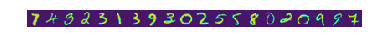

In [36]:
sample = np.random.choice(X.shape[0], 20)
plt.imshow(X[sample,1:].reshape(-1,20).T)
plt.axis('off');

### Multiclass Classification

In [37]:
def sigmoid(z):
    return(1 / (1 + np.exp(-z)))

In [38]:
def cost(theta, reg, X, y):
    m = y.size
    h = sigmoid(X.dot(theta))
    
    J = -1*(1.0/m)*(np.log(h).T.dot(y)+np.log(1-h).T.dot(1-y)) + (reg/(2*m))*np.sum(np.square(theta[1:]))
    
    if np.isnan(J[0]):
        return(np.inf)
    return(J[0])    

In [39]:
def gradient(theta, reg, X,y):
    m = y.size
    h = sigmoid(X.dot(theta.reshape(-1,1)))
      
    grad = (1.0/m)*X.T.dot(h-y) + (reg/m)*np.r_[[[0]],theta[1:].reshape(-1,1)]
        
    return(grad.flatten())

#### One-vs-all Classification

In [40]:
def one_vs_all(features, classes, n_labels, reg):
    initial_theta = np.zeros((X.shape[1],1))  # 401x1
    all_theta = np.zeros((n_labels, X.shape[1])) #10x401

    for c in np.arange(1, n_labels+1):
        res = minimize(cost, initial_theta, args=(reg, features, (classes == c)*1), method=None,
                       jac=lrgradientReg, options={'maxiter':50})
        all_theta[c-1] = res.x
    return(all_theta)

In [41]:
theta = one_vs_all(X, y, 10, 0.1)

#### One-vs-all Prediction

In [42]:
def predictone_vs_all(all_theta, features):
    probs = sigmoid(features.dot(all_theta.T))
    
    return(np.argmax(probs, axis=1)+1)

In [43]:
pred = predictone_vs_all(theta, X)
print('Training set accuracy: {} %'.format(np.mean(pred == y.ravel())*100))

Training set accuracy: 93.24 %


### Neural Networks

In [45]:
def predict(theta_1, theta_2, features):
    z2 = theta_1.dot(features.T)
    a2 = np.c_[np.ones((data['X'].shape[0],1)), sigmoid(z2).T]
    
    z3 = a2.dot(theta_2.T)
    a3 = sigmoid(z3)
        
    return(np.argmax(a3, axis=1)+1) 

In [46]:
pred = predict(theta1, theta2, X)
print('Training set accuracy: {} %'.format(np.mean(pred == y.ravel())*100))

Training set accuracy: 97.52 %
